# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 587


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [18]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | waitangi
Processing Record 2 of Set 1 | tofol
Processing Record 3 of Set 1 | hamilton
Processing Record 4 of Set 1 | somanda
Processing Record 5 of Set 1 | tralee
Processing Record 6 of Set 1 | east london
Processing Record 7 of Set 1 | aasiaat
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | port-aux-francais
Processing Record 10 of Set 1 | mazagao
Processing Record 11 of Set 1 | olonkinbyen
Processing Record 12 of Set 1 | susuman
Processing Record 13 of Set 1 | rawson
Processing Record 14 of Set 1 | tocopilla
Processing Record 15 of Set 1 | albany
Processing Record 16 of Set 1 | filey
Processing Record 17 of Set 1 | fort st. john
Processing Record 18 of Set 1 | fukuecho
Processing Record 19 of Set 1 | salahonda
Processing Record 20 of Set 1 | tura
Processing Record 21 of Set 1 | praia da vitoria
Processing Record 22 of Set 1 | bredasdorp
Processing Record 23 of Set 1 | wail

In [19]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          563
Lat           563
Lng           563
Max Temp      563
Humidity      563
Cloudiness    563
Wind Speed    563
Country       563
Date          563
dtype: int64

In [20]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,waitangi,-43.9535,-176.5597,7.68,93,90,0.45,NZ,1699465669
1,tofol,5.3248,163.0078,28.97,77,85,6.58,FM,1699465669
2,hamilton,39.1834,-84.5333,25.55,59,20,7.72,US,1699465572
3,somanda,-3.3667,33.9500,22.69,71,81,5.93,TZ,1699465669
4,tralee,52.2704,-9.7026,7.14,87,40,5.66,IE,1699465669


In [21]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [22]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,7.68,93,90,0.45,NZ,1699465669
1,tofol,5.3248,163.0078,28.97,77,85,6.58,FM,1699465669
2,hamilton,39.1834,-84.5333,25.55,59,20,7.72,US,1699465572
3,somanda,-3.3667,33.9500,22.69,71,81,5.93,TZ,1699465669
4,tralee,52.2704,-9.7026,7.14,87,40,5.66,IE,1699465669


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

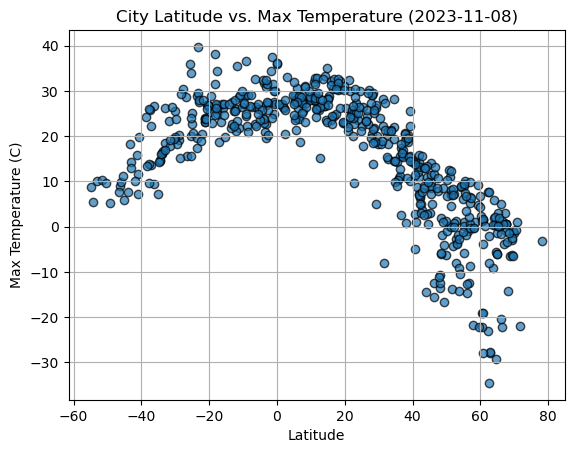

In [32]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values,y_values,edgecolors='black',alpha=0.7)

# Incorporate the other graph properties
plt.title('City Latitude vs. Max Temperature (2023-11-08)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

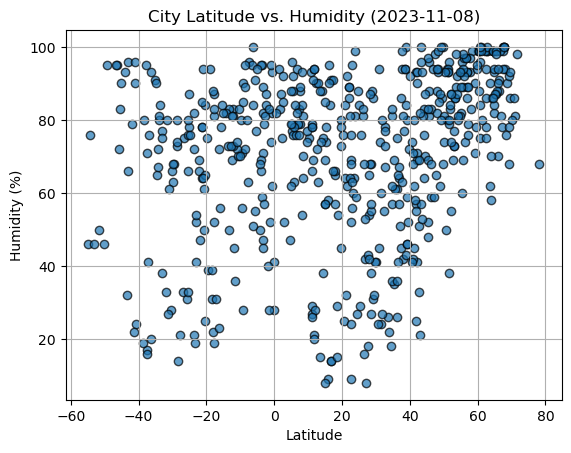

In [34]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values,y_values,edgecolors='black',alpha=0.7)

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity (2023-11-08)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

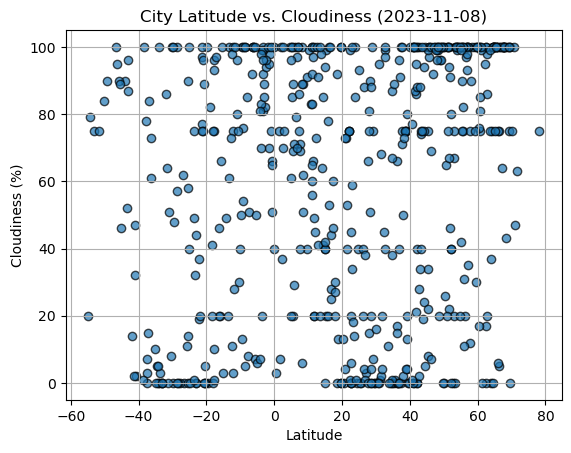

In [35]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values,y_values,edgecolors='black',alpha=0.7)

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness (2023-11-08)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

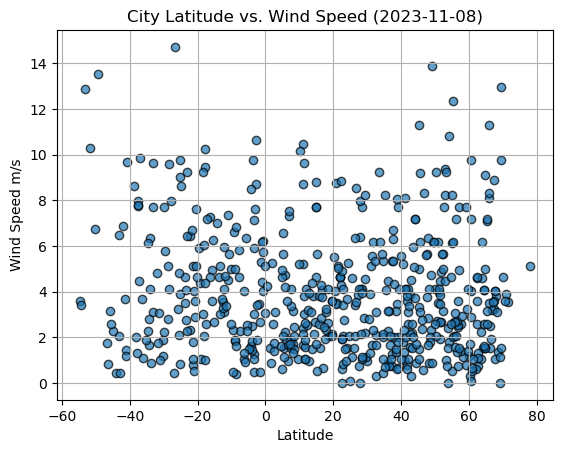

In [37]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values,y_values,edgecolors='black',alpha=0.7)

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed (2023-11-08)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed m/s')
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [54]:
# Define a function to create Linear Regression plots
def linear_regression(x,y,equation_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
    print(f"The r-value is: {rvalue}")
    regress_line = x * slope + intercept
    equation = f"y = {slope: .2f}x + {intercept: .2f}"
    plt.plot(x,regress_line,"r-")
    plt.annotate(equation,equation_coordinates, fontsize=15, color="red")
    plt.scatter(x,y)
    plt.xlabel(f"{x.name}")
    plt.ylabel(f"{y.name}")

In [40]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,tofol,5.3248,163.0078,28.97,77,85,6.58,FM,1699465669
2,hamilton,39.1834,-84.5333,25.55,59,20,7.72,US,1699465572
4,tralee,52.2704,-9.7026,7.14,87,40,5.66,IE,1699465669
6,aasiaat,68.7098,-52.8699,-6.49,90,100,1.35,GL,1699465670
10,olonkinbyen,70.9221,-8.7187,0.91,81,47,3.91,SJ,1699465671


In [41]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,7.68,93,90,0.45,NZ,1699465669
3,somanda,-3.3667,33.9500,22.69,71,81,5.93,TZ,1699465669
5,east london,-33.0153,27.9116,18.52,77,0,3.09,ZA,1699465266
7,ushuaia,-54.8000,-68.3000,8.79,46,20,3.58,AR,1699465670
8,port-aux-francais,-49.3500,70.2167,5.29,95,90,13.52,TF,1699465670


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8458106164265263


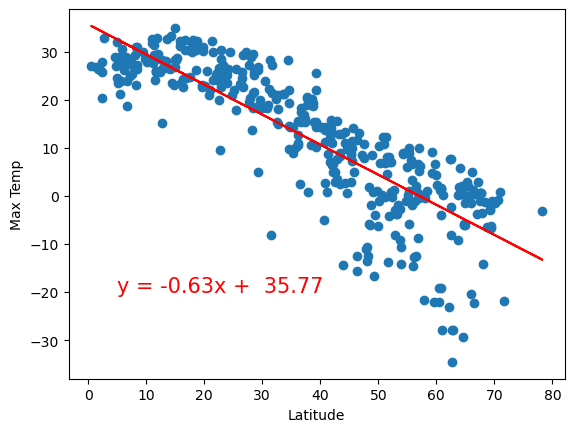

In [58]:
# Linear regression on Northern Hemisphere
linear_regression(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Max Temp"], (5,-20))

The r-value is: 0.7176974329185922


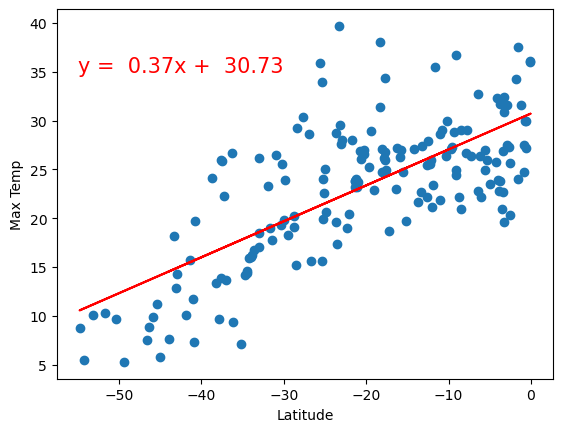

In [59]:
# Linear regression on Southern Hemisphere
linear_regression(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Max Temp"], (-55,35))

**Discussion about the linear relationship:** There appears to be a strong negative relationship between Latitude and Max Temp in the Northern hemisphere, and a strong positive relationship between Latitude and Max Temp in the Southern hemisphere. This likely reflects that Max Temps are the highest at the equator, and lowest at the poles.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.34444284458816443


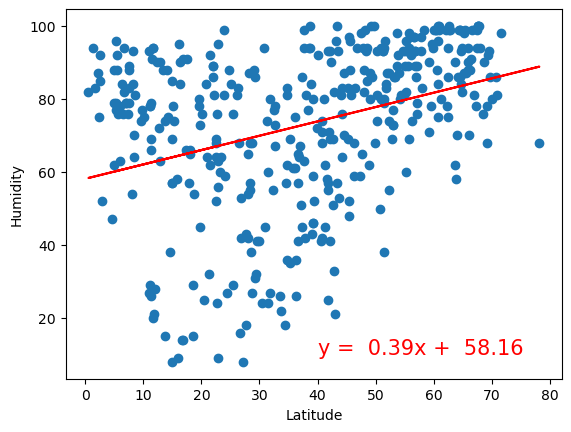

In [60]:
# Northern Hemisphere
linear_regression(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Humidity"], (40,10))

The r-value is: 0.10484993870238278


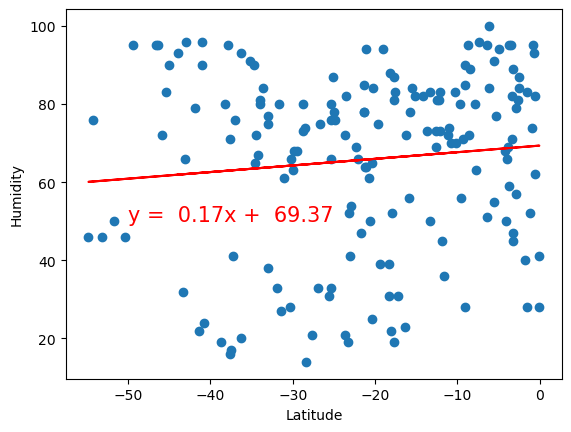

In [62]:
# Southern Hemisphere
linear_regression(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Humidity"], (-50,50))

**Discussion about the linear relationship:** In the northern hemisphere there is some positive correlation between the Latitude and the Humidity, and little correlation in the southern hemisphere. There could be large system or front moving through the northern hemisphere at the time of analysis to explain the discrepancy.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.1900047382138397


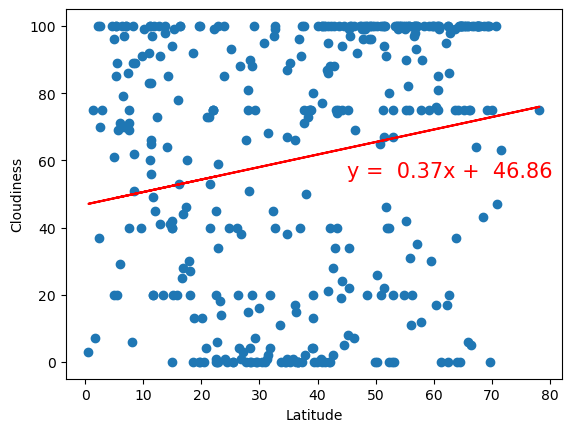

In [65]:
# Northern Hemisphere
linear_regression(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Cloudiness"], (45,55))

The r-value is: 0.2339032051749898


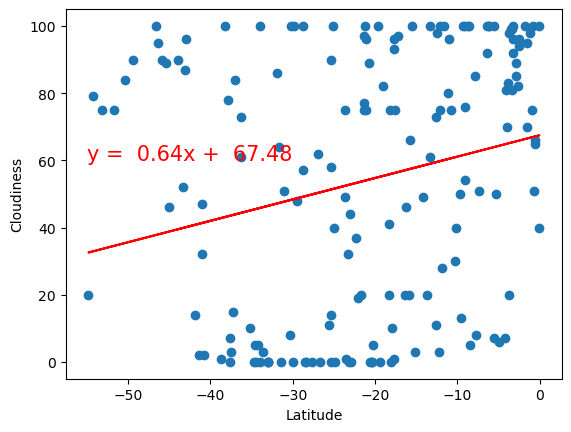

In [67]:
# Southern Hemisphere
linear_regression(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Cloudiness"], (-55,60))

**Discussion about the linear relationship:** In both hemispheres there is little correlation between Latitude and Cloudiness. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.07729227428172597


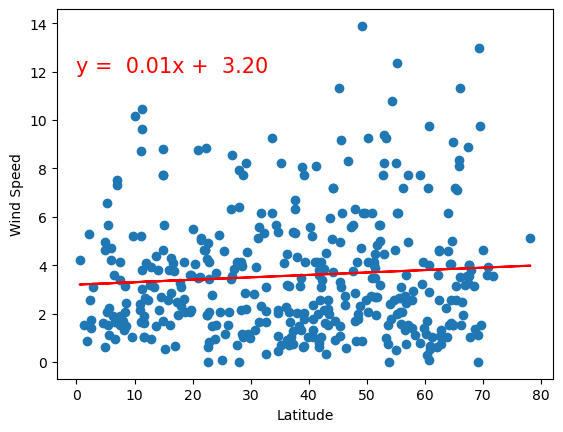

In [69]:
# Northern Hemisphere
linear_regression(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Wind Speed"], (0,12))

The r-value is: -0.10563474526056404


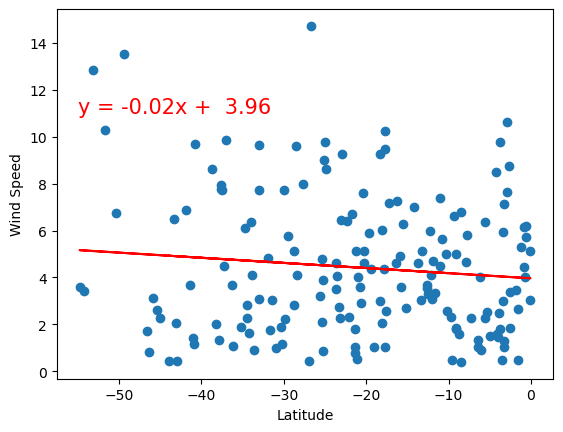

In [71]:
# Southern Hemisphere
linear_regression(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Wind Speed"], (-55,11))

**Discussion about the linear relationship:** In both hemispheres there is little to no correlation between Latitude and Wind Speed.